# Any Relationships? 

Congratulations! In this lab, you are a researcher for the U.S. Department of Education and you are trying to establish whether there is a relationship between Education Expenditure and SAT Scores. As a researcher, you also want to know if a higher pupil/teacher ratio results in better SAT scores. This will help the Dept. of Education decide if the more impoverished students are at a disadvantage while taking the SAT.

For this investigation, you are provided a dataset which was collected between 1994 and 1995. In this dataset, we have a data frame with 50 observations on the following variables:

- state: a factor with names of each state

- expend: expenditure per pupil in average daily attendance in public elementary and secondary schools, 1994-95 (in thousands of US dollars)

- ratio: average pupil/teacher ratio in public elementary and secondary schools, Fall 1994

- sat: average total SAT score, 1994-95

So let's start to look at the data and check for correlations!

### Reminder
- Make sure to run every cell with Python code and observe the output
- Complete all puzzles and submit this lab before Monday evening at 11:59pm.

### Getting Help

Remember, there are a lot of ways to get help if you find yourself stuck:

1. In lab section, your TA, CAs, and your peers are here for you!


2. On the course Piazza page: https://piazza.com/illinois/fall2019/stat107


3. Office Hours:

  - Open office hours **every Monday, Wednesday, Thursday, and Friday** from 4:00pm - 6:30pm in 23 Illini Hall

  - Prof. Wade + Prof. Karle are available every Wednesday from 8:30am - 10:00am in 2215 Siebel Center

Have fun discovering relationships :) 
###### And remember keeping cheatsheet for syntax always helps! 

## Part 0 | Data Overview

First of all, at the beginning of any data analysis, it is important to start with some quick exporatory data analysis (EDA). We can call the first few rows (head) and last few rows (tail) of the data set to see that everything is what we would expect. Additionally, we can look at the variable names, formats, and some summary statistics.

### Notebook Setup

We have provided the setup for libraries today, including `pandas` and visualization libraries (`matplotlib` and `seaborn`):
#### In case, you don't have seaborn/ sklearn installed, please install it first by running : 
```
conda install seaborn
conda install scikit-learn 
```

In [1]:
# Standard imports:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Visulaization options:
#%matplotlib inline

# We do this to ignore several specific pandas warnings:
#import warnings
#warnings.filterwarnings("ignore")

# Use default white plot style:
#sns.set(style="white")

### Read the CSV file

In the following cell, read the `dataa.csv` file and print out **10 random rows** from that file.

In [2]:
df = pd.read_csv("dataa.csv")


df.sample(10)

,state,expend,ratio,total
45,Virginia,5.327,14.6,896
4,California,4.992,24.0,902
44,Vermont,6.750,13.8,901
46,Washington,5.906,20.2,937
30,New Mexico,4.586,17.2,1015
32,North Carolina,5.077,16.2,865
24,Missouri,5.383,15.5,1045
49,Wyoming,6.160,14.9,1001
15,Kansas,5.817,15.1,1060
37,Pennsylvania,7.109,17.1,880


In [4]:
## == TEST CASES for dataset ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(len(df)==50), "You dataset might not be correct"

### EDA: Top Five Rows

Output the first five rows of your dataset:

In [7]:
head = df.head(5)
head


,state,expend,ratio,total
0,Alabama,4.405,17.2,1029
1,Alaska,8.963,17.6,934
2,Arizona,4.778,19.3,944
3,Arkansas,4.459,17.1,1005
4,California,4.992,24.0,902


In [8]:
## == TEST CASES for head ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(len(head)==5), "You head might not be correct"

### EDA: Last Five Rows

Output the last five rows of your dataset.

In [9]:
tail = df.tail(5)
tail


,state,expend,ratio,total
45,Virginia,5.327,14.6,896
46,Washington,5.906,20.2,937
47,West Virginia,6.107,14.8,932
48,Wisconsin,6.930,15.9,1073
49,Wyoming,6.160,14.9,1001


In [10]:
## == TEST CASES for tail ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(len(tail)==5), "You tail might not be correct"

### EDA: Numeric Data Overview

Use `df.describe()` to print out summary information about all numeric data columns in your dataset.

In [11]:
description = df.describe()
description


,expend,ratio,total
count,50.000000,50.000000,50.000000
mean,5.905260,16.858000,965.920000
std,1.362807,2.266355,74.820558
min,3.656000,13.800000,844.000000
25%,4.881750,15.225000,897.250000
50%,5.767500,16.600000,945.500000
75%,6.434000,17.575000,1032.000000
max,9.774000,24.300000,1107.000000


In [13]:
## == TEST CASES for description ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(len(description)==8), "You description might not be correct"

### YAYYY!

Now lets move forward with the analysis! As previously stated, in this lab we would like to find out if the two variables (Education Expenditure and pupil/teacher ratio) have a relationship with SAT scores. We already learned some techniques in class to figure this out, right? But first, let's visualize the data to see if there are any correlations.

## Part 1 | First, let's create some scatterplots!

It is really important to visualize your data first to see if there are any correlations between pairwise variables before doing further analysis. This helps us understand the relations between variables clearly.

### Puzzle 1.1a: 

In the following cell, write the Python code to create scatterplots between the total expenditure, `expend` and average total SAT score, `total`.

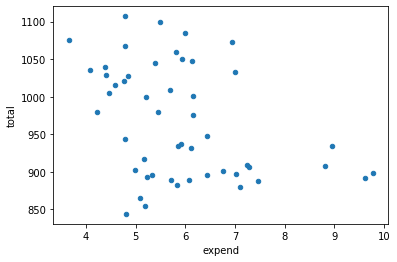

In [14]:
# Create a scatter plot between 'expend' (x-axis) and 'total'(y-axis). 
df.plot.scatter(x = "expend", y = "total")



### Puzzle 1.1b: 

The researchers also had a hypothesis that better pupil/teacher ratio leads to better SAT scores. So go ahead and also create a scatterplot between average pupil/teacher ratio in public elementary and secondary schools,`ratio`, and SAT score,`total`.

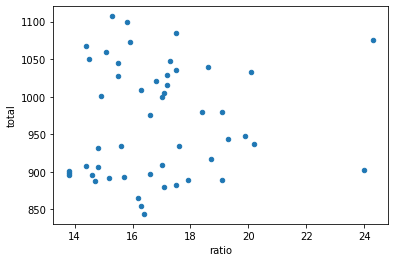

In [15]:
# Create a scatter plot between 'ratio'(x-axis) and 'total'(y-axis). 
df.plot.scatter(x = "ratio", y = "total")



### Puzzle 1.2a:  Correlations

Look at both of your scatter plots.  Do you think any of these pairs have **correlations**?

- Is the correlation coefficent positive?
- Is the correlation coefficent negative? -First This
- Is the correlation coefficent zero? -Second Close to This

### Puzzle 1.2b: Correlation Matrix

You just took a guess for the correlation. Now, its time to see the actual values. In the following cell, write the Python code to find the **correlation matrix** of our data.  Think about what you can see between the pairs. 

In [19]:
cor = df.corr()
cor

,expend,ratio,total
expend,1.000000,-0.371025,-0.380537
ratio,-0.371025,1.000000,0.081254
total,-0.380537,0.081254,1.000000


In [20]:
## == TEST CASES for Puzzle 1.2b ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(cor['expend']["expend"] == cor['ratio']["ratio"] == cor['total']["total"]),"Are you sure the correlations are correct?"

### Puzzle 1.2c: Reflections

- What does a negative correlation mean? Negative relationship between var
- Can we say something about **causality** by looking for correlations between the variables? --No

## Part 2 | Simple Linear Regression

### 2.1a. Linear Regression coefficents (slope and y-intercept)

Checking the descriptive statistics is useful and gives us a basic idea of the data. Sometimes, we want to use the data that we have to make predictions.  We can do this using simple linear regression.

The simple linear equation is:

$Y = (slope)*X + intercept$

- X is called as independent variable
- Y is the dependent variable.

### Puzzle 2.1: 
In the following cell, write the Python code to create the simple regression model to predict the average total score from expenditure per pupil in average daily attendance in public elementary and secondary schools.

First, train the `LinearRegression` model with our data:

In [32]:
# Create a linear regression model:
model = LinearRegression()

# Train ("fit") the model:
model = model.fit(df[['expend']],df['total'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


### Puzzle 2.1b:

Use `model.intercept_` and `model.coef_` to display the y-intercept ($b_0$) and slope ($b_1$) of the linear regression.  (If your `LinearRegression` variable is something other than `model`, you will need to use that instead of `model`.)

In [28]:
# Find the intercept:
intercept = model.intercept_
intercept



1089.2937177502226

In [29]:
# Find the slope:
slope = model.coef_
slope



array([-20.89217371])

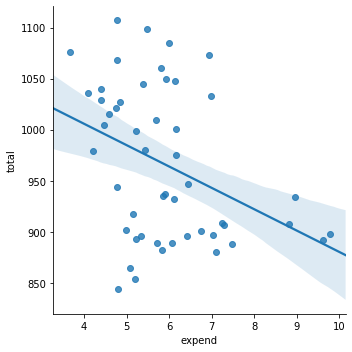

In [47]:
sns.lmplot(x='expend',y='total',data=df)


In [34]:
## == TEST CASES for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(round(intercept,2) ==1089.29), "The intercept doesn't seem correct"
assert(round(slope[0],2)== -20.89), "The coefficent doesn't seem correct"

### 2.2 Residuals

Look at the plot above and think about it for a second. Does this linear regression line predict all of our data perfectly or do we have some error?  The distance that each point is from the regression line is called the residual or prediction error.  Unless we have a perfect correlation, we will have some error.

**Residuals are the differences between the observed value of $y$ and the predicted value of y ($\hat{y}$).** 

Lets find the residuals!

### Puzzle 2.2a: 

In the following cell, write the Python code to store the predicted `total` as `total_predicted`:

In [41]:
df["total_predicted"] = model.predict(df[['expend']])



df["total_predicted"]

0      997.263693
1      902.037165
2      989.470912
3      996.135515
4      984.999987
5      975.577616
6      905.087422
7      942.421737
8      969.832268
9      980.800660
10     962.311086
11    1001.337666
12     961.099340
13     967.575914
14     974.741929
15     967.763943
16     980.299247
17     989.826079
18     954.998825
19     937.929919
20     937.052448
21     943.173855
22     963.940675
23    1004.053649
24     976.831147
25     970.375465
26     965.298667
27     981.490101
28     966.886472
29     885.093612
30     993.482209
31     888.248330
32     983.224152
33     989.533588
34     960.556143
35     988.071136
36     954.831688
37     940.771255
38     933.250072
39     989.073960
40     989.533588
41     997.618859
42     980.194787
43    1012.911931
44     948.271545
45     978.001108
46     965.904540
47     961.705213
48     944.510954
49     960.597928
Name: total_predicted, dtype: float64

### Puzzle 2.2b: 

In the following cell, write the Python code to store the error for of the column `total` as `total_error`:

In [42]:
df["total_error"] = df["total"] - df["total_predicted"]



df["total_error"]

0      31.736307
1      31.962835
2     -45.470912
3       8.864485
4     -82.999987
5       4.422384
6       2.912578
7     -45.421737
8     -80.832268
9    -126.800660
10    -73.311086
11    -22.337666
12     86.900660
13    -85.575914
14    124.258071
15     92.236057
16     18.700753
17     31.173921
18    -58.998825
19    -28.929919
20    -30.052448
21     89.826145
22    121.059325
23     31.946351
24     68.168853
25     38.624535
26     84.701333
27    -64.490101
28    -31.886472
29     12.906388
30     21.517791
31      3.751670
32   -118.224152
33    117.466412
34     14.443857
35     38.928864
36     -7.831688
37    -60.771255
38    -45.250072
39   -145.073960
40     78.466412
41     42.381141
42    -87.194787
43     63.088069
44    -47.271545
45    -82.001108
46    -28.904540
47    -29.705213
48    128.489046
49     40.402072
Name: total_error, dtype: float64

In [44]:
## == TEST CASES for Puzzle 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(round(df["total_error"].sum(), 3) == 0), "The residuals might not be correct. Please check again!"

### Turn In

You're almost done -- congratulations!

You need to do two more things:

1. Save your work.  To do this, create a **notebook checkpoint** by using the menu within the notebook to go **File -> Save and Checkpoint**

2. After you have saved and checkpointed, exit this notebook and return to the Data Science Discovery page on how to use git to turn this notebook into the course!